In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('Heart.csv')

In [3]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [4]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


/Users/kamlishgoswami/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MaxHR'>

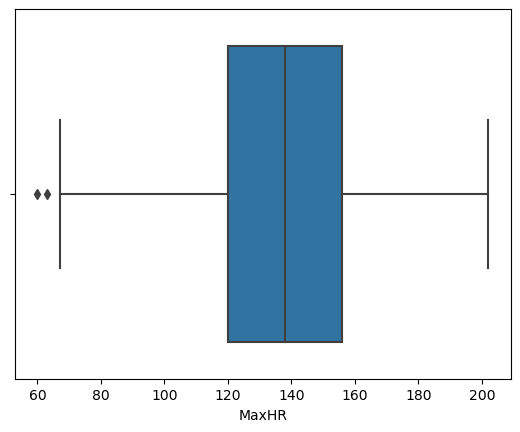

In [5]:
# Removing Outliers 

import seaborn as sn

sn.boxplot(df.MaxHR)

In [6]:
# Removing Outliers using Z-Score

# From the dataset these columns have outliers (RestingBP, Cholesterol, FastingBS, MaxHR, Oldpeak)



In [7]:
mean_RestingBP = df.RestingBP.mean()
std_RestingBP = df.RestingBP.std()
right_d_RestingBP = mean_RestingBP + 3*std_RestingBP
left_d_RestingBP = mean_RestingBP - 3*std_RestingBP

In [8]:
print(left_d_RestingBP,right_d_RestingBP)

76.85405180149661 187.93897652094347


In [9]:
outliers_RestingBP = df[(df.RestingBP>right_d_RestingBP) | (df.RestingBP<left_d_RestingBP)]

In [10]:
outliers_RestingBP

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
109,39,M,ATA,190,241,0,Normal,106,N,0.0,Up,0
241,54,M,ASY,200,198,0,Normal,142,Y,2.0,Flat,1
365,64,F,ASY,200,0,0,Normal,140,Y,1.0,Flat,1
399,61,M,NAP,200,0,1,ST,70,N,0.0,Flat,1
449,55,M,NAP,0,0,0,Normal,155,N,1.5,Flat,1
592,61,M,ASY,190,287,1,LVH,150,Y,2.0,Down,1
732,56,F,ASY,200,288,1,LVH,133,Y,4.0,Down,1
759,54,M,ATA,192,283,0,LVH,195,N,0.0,Up,1


In [11]:
outliers_RestingBP.shape

(8, 12)

In [12]:
df1 = df[(df.RestingBP<right_d_RestingBP) & (df.RestingBP>left_d_RestingBP)]
df1.shape

(910, 12)

In [13]:
mean_Cholesterol = df.Cholesterol.mean()
std_Cholesterol = df.Cholesterol.std()
right_d_Cholesterol = mean_Cholesterol + 3*std_Cholesterol
left_d_Cholesterol = mean_Cholesterol - 3*std_Cholesterol

In [14]:
print(left_d_Cholesterol,right_d_Cholesterol)

-129.35286938645763 526.9519979267626


In [15]:
outliers_Cholesterol = df1[(df1.Cholesterol < left_d_Cholesterol) | (df1.Cholesterol > right_d_Cholesterol) ]

In [16]:
outliers_Cholesterol

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
76,32,M,ASY,118,529,0,Normal,130,N,0.0,Flat,1
149,54,M,ASY,130,603,1,Normal,125,Y,1.0,Flat,1
616,67,F,NAP,115,564,0,LVH,160,N,1.6,Flat,0


In [17]:
df2 = df1[(df1.Cholesterol > left_d_Cholesterol) & (df.Cholesterol < right_d_Cholesterol) ]

/var/folders/7t/dhmgzn950d78sjl8lmzs1p_m0000gn/T/ipykernel_50425/9537520.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df2 = df1[(df1.Cholesterol > left_d_Cholesterol) & (df.Cholesterol < right_d_Cholesterol) ]


In [18]:
df2.shape

(907, 12)

In [19]:
mean_FastingBS = df.FastingBS.mean()
std_FastingBS = df.FastingBS.std()
right_d_FastingBS = mean_FastingBS + 3*std_FastingBS
left_d_FastingBS = mean_FastingBS - 3*std_FastingBS

In [20]:
print(left_d_FastingBS,right_d_FastingBS)

-1.0360214058083201 1.502252342627492


In [21]:
outliers_FastingBS = df2[(df2.FastingBS < left_d_FastingBS) | (df2.FastingBS > right_d_FastingBS) ]

In [22]:
outliers_FastingBS 

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease


In [23]:
mean_MaxHR = df.MaxHR.mean()
std_MaxHR = df.MaxHR.std()
right_d_MaxHR = mean_MaxHR + 3*std_MaxHR
left_d_MaxHR = mean_MaxHR - 3*std_MaxHR

In [24]:
print(left_d_MaxHR,right_d_MaxHR)

60.42836577697024 213.19037060647202


In [25]:
outliers_MaxHR = df2[(df2.MaxHR < left_d_MaxHR) | (df2.MaxHR > right_d_MaxHR) ]

In [26]:
outliers_MaxHR

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
390,51,M,ASY,140,0,0,Normal,60,N,0.0,Flat,1


In [27]:
df3 = df2[(df2.MaxHR > left_d_MaxHR) & (df2.MaxHR < right_d_MaxHR) ]
df3.shape

(906, 12)

In [28]:
mean_Oldpeak = df.Oldpeak.mean()
std_Oldpeak = df.Oldpeak.std()
right_d_Oldpeak = mean_Oldpeak + 3*std_Oldpeak
left_d_Oldpeak = mean_Oldpeak - 3*std_Oldpeak

In [29]:
print(left_d_Oldpeak,right_d_Oldpeak)

-2.3123466187253117 4.087074287570628


In [30]:
outliers_Oldpeak = df3[(df.Oldpeak < left_d_Oldpeak) | (df3.Oldpeak > right_d_Oldpeak) ]

/var/folders/7t/dhmgzn950d78sjl8lmzs1p_m0000gn/T/ipykernel_50425/2409756005.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  outliers_Oldpeak = df3[(df.Oldpeak < left_d_Oldpeak) | (df3.Oldpeak > right_d_Oldpeak) ]


In [31]:
outliers_Oldpeak 

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
166,50,M,ASY,140,231,0,ST,140,Y,5.0,Flat,1
324,46,M,ASY,100,0,1,ST,133,N,-2.6,Flat,1
702,59,M,TA,178,270,0,LVH,145,N,4.2,Down,0
771,55,M,ASY,140,217,0,Normal,111,Y,5.6,Down,1
791,51,M,ASY,140,298,0,Normal,122,Y,4.2,Flat,1
850,62,F,ASY,160,164,0,LVH,145,N,6.2,Down,1
900,58,M,ASY,114,318,0,ST,140,N,4.4,Down,1


In [32]:
df4 = df3[(df.Oldpeak > left_d_Oldpeak) & (df3.Oldpeak < right_d_Oldpeak) ]

/var/folders/7t/dhmgzn950d78sjl8lmzs1p_m0000gn/T/ipykernel_50425/1786266820.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df4 = df3[(df.Oldpeak > left_d_Oldpeak) & (df3.Oldpeak < right_d_Oldpeak) ]


In [33]:
df4.shape

(899, 12)

In [34]:
df4.Sex.unique()

array(['M', 'F'], dtype=object)

In [35]:
df4.ChestPainType.unique()

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

In [36]:
df4.RestingECG.unique()

array(['Normal', 'ST', 'LVH'], dtype=object)

In [37]:
df4.ExerciseAngina.unique()

array(['N', 'Y'], dtype=object)

In [38]:
df4.ST_Slope.unique()

array(['Up', 'Flat', 'Down'], dtype=object)

In [39]:
df5 = df4.copy()
df5.ExerciseAngina.replace({'Y' : 1 , 'N' :0},inplace = True)
df5.ST_Slope.replace({'Up' : 2, 'Flat': 1, 'Down' : 0},inplace=True)
df5.RestingECG.replace({'Normal': 1, 'ST': 2, 'LVH': 3},inplace=True)


In [40]:
df5

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,1,172,0,0.0,2,0
1,49,F,NAP,160,180,0,1,156,0,1.0,1,1
2,37,M,ATA,130,283,0,2,98,0,0.0,2,0
3,48,F,ASY,138,214,0,1,108,1,1.5,1,1
4,54,M,NAP,150,195,0,1,122,0,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,1,132,0,1.2,1,1
914,68,M,ASY,144,193,1,1,141,0,3.4,1,1
915,57,M,ASY,130,131,0,1,115,1,1.2,1,1
916,57,F,ATA,130,236,0,3,174,0,0.0,1,1


In [41]:
df6 = pd.get_dummies(df4, drop_first= True)

In [42]:
X = df6.drop('HeartDisease', axis=1)

In [43]:
y = df6[['HeartDisease']]

In [44]:
X

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,1,1,0,0,1,0,0,0,1
1,49,160,180,0,156,1.0,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,1,1,0,0,0,1,0,0,1
3,48,138,214,0,108,1.5,0,0,0,0,1,0,1,1,0
4,54,150,195,0,122,0.0,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1,0,0,1,1,0,0,1,0
914,68,144,193,1,141,3.4,1,0,0,0,1,0,0,1,0
915,57,130,131,0,115,1.2,1,0,0,0,1,0,1,1,0
916,57,130,236,0,174,0.0,0,1,0,0,0,0,0,1,0


In [45]:
# Applying Scaling 

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [63]:
print(X_scaled)

[[-1.42815446  0.46590022  0.84963584 ... -0.8229452  -0.99888827
   1.13469459]
 [-0.47585532  1.63471366 -0.16812204 ... -0.8229452   1.00111297
  -0.88129441]
 [-1.7455875  -0.1185065   0.79361247 ... -0.8229452  -0.99888827
   1.13469459]
 ...
 [ 0.3706328  -0.1185065  -0.62564622 ...  1.21514774  1.00111297
  -0.88129441]
 [ 0.3706328  -0.1185065   0.35476274 ... -0.8229452   1.00111297
  -0.88129441]
 [-1.63977649  0.34901888 -0.21480818 ... -0.8229452  -0.99888827
   1.13469459]]


In [47]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=30)

In [48]:
X_test.shape

(180, 15)

In [49]:
X_train.shape

(719, 15)

In [50]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)
model_rf.score(X_test, y_test)

/var/folders/7t/dhmgzn950d78sjl8lmzs1p_m0000gn/T/ipykernel_50425/4034110208.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf.fit(X_train, y_train)


0.85

In [51]:
X

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,1,1,0,0,1,0,0,0,1
1,49,160,180,0,156,1.0,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,1,1,0,0,0,1,0,0,1
3,48,138,214,0,108,1.5,0,0,0,0,1,0,1,1,0
4,54,150,195,0,122,0.0,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1,0,0,1,1,0,0,1,0
914,68,144,193,1,141,3.4,1,0,0,0,1,0,0,1,0
915,57,130,131,0,115,1.2,1,0,0,0,1,0,1,1,0
916,57,130,236,0,174,0.0,0,1,0,0,0,0,0,1,0


In [59]:
from sklearn.decomposition import PCA
pca = PCA(0.95)
X_pca = pca.fit_transform(X)

In [60]:
X_pca

array([[ 93.12962152, -29.67914603],
       [-16.33851633, -14.7998355 ],
       [ 82.66962658,  38.9118718 ],
       ...,
       [-68.22608631,  17.69794714],
       [ 40.02624242, -33.4650307 ],
       [-20.6125201 , -37.61693802]])

In [61]:
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=30)

In [62]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier()
model_rf.fit(X_train_pca, y_train)
model_rf.score(X_test_pca, y_test)

/var/folders/7t/dhmgzn950d78sjl8lmzs1p_m0000gn/T/ipykernel_50425/2880770640.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf.fit(X_train_pca, y_train)


0.6555555555555556